In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [39]:
t = Table.read_table("us_crime.csv")
t

State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Revised rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
Alabama,1960,3266740,6097,406,281,nan,898,4512,33823,11626,19344,2853
Alabama,1961,3302000,5564,427,252,nan,630,4255,32541,11205,18801,2535
Alabama,1962,3358000,5283,316,218,nan,754,3995,35829,11722,21306,2801
Alabama,1963,3347000,6115,340,192,nan,828,4755,38521,12614,22874,3033
Alabama,1964,3407000,7260,316,397,nan,992,5555,46290,15898,26713,3679
Alabama,1965,3462000,6916,395,367,nan,992,5162,48215,16398,28115,3702
Alabama,1966,3517000,8098,384,341,nan,1124,6249,53740,18551,30583,4606
Alabama,1967,3540000,8448,415,371,nan,1167,6495,57079,20227,31682,5170
Alabama,1968,3566000,8288,421,396,nan,1462,6009,62997,22403,34508,6086
Alabama,1969,3531000,8842,485,494,nan,1448,6415,66248,23559,36644,6045


### What does one row represent?
a. One crime.
b. One type of crime.
c. One year in one state.
d. One state.
e. One year.

### Create a table without the rows for the whole US

In [40]:
# First find out what it's called.
t.sort("Population", descending=True)

State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Revised rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
United States-Total,2014,318857056,1197987,14249,84041,116645,325802,741291,8277829,1729806,5858496,689527
United States-Total,2013,316497531,1199684,14319,82109,113695,345095,726575,8650761,1931835,6018632,700294
United States-Total,2012,313873685,1217067,14866,85141,nan,355051,762009,9001992,2109932,6168874,723186
United States-Total,2011,311587816,1206031,14661,84175,nan,354772,752423,9052743,2185140,6151095,716508
United States-Total,2010,309330219,1251248,14722,85593,nan,369089,781844,9112625,2168459,6204601,739565
United States-Total,2009,307006550,1325896,15399,89241,nan,408742,812514,9337060,2203313,6338095,795652
United States-Total,2008,304059724,1394461,16465,90750,nan,443563,843683,9774152,2228887,6586206,959059
United States-Total,2007,301621157,1422970,17128,92160,nan,447324,866358,9882212,2190198,6591542,1100472
United States-Total,2006,299398484,1435123,17309,94472,nan,449246,874096,10019601,2194993,6626363,1198245
United States-Total,2005,296507061,1390745,16740,94347,nan,417438,862220,10174754,2155448,6783447,1235859


In [41]:
states = t.where("State", are.not_equal_to("United States-Total"))
states

State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Revised rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
Alabama,1960,3266740,6097,406,281,nan,898,4512,33823,11626,19344,2853
Alabama,1961,3302000,5564,427,252,nan,630,4255,32541,11205,18801,2535
Alabama,1962,3358000,5283,316,218,nan,754,3995,35829,11722,21306,2801
Alabama,1963,3347000,6115,340,192,nan,828,4755,38521,12614,22874,3033
Alabama,1964,3407000,7260,316,397,nan,992,5555,46290,15898,26713,3679
Alabama,1965,3462000,6916,395,367,nan,992,5162,48215,16398,28115,3702
Alabama,1966,3517000,8098,384,341,nan,1124,6249,53740,18551,30583,4606
Alabama,1967,3540000,8448,415,371,nan,1167,6495,57079,20227,31682,5170
Alabama,1968,3566000,8288,421,396,nan,1462,6009,62997,22403,34508,6086
Alabama,1969,3531000,8842,485,494,nan,1448,6415,66248,23559,36644,6045


### Create a table containing only the row with the least total property crime?

In [8]:
states.sort("Property crime total").take(np.arange(1))

State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Revised rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
Vermont,1961,395000,79,6,36,nan,16,21,3147,1324,1489,334


### The state for that row?

In [42]:
states.sort("Property crime total").column("State").item(0)

'Vermont'

## The total population per year

In [43]:
states.select("Year", "Population").group("Year", sum)

Year,Population sum
1960,162540871
1961,165923956
1962,168418000
1963,170825000
1964,173419000
1965,193816000
1966,195857000
1967,197864000
1968,199860000
1969,201927000


## A line graph of population

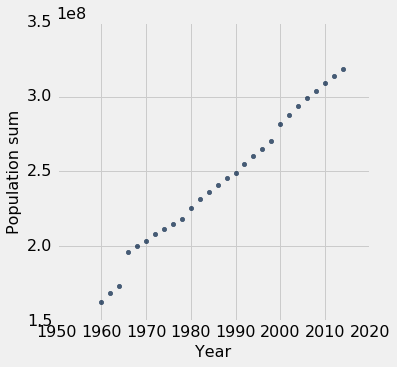

In [44]:
even_years = np.arange(1960, 2050, 2)
states.select("Year", "Population").group("Year", sum).where("Year", are.contained_in(even_years)).scatter("Year", "Population sum")

## What happened around 1964-66?

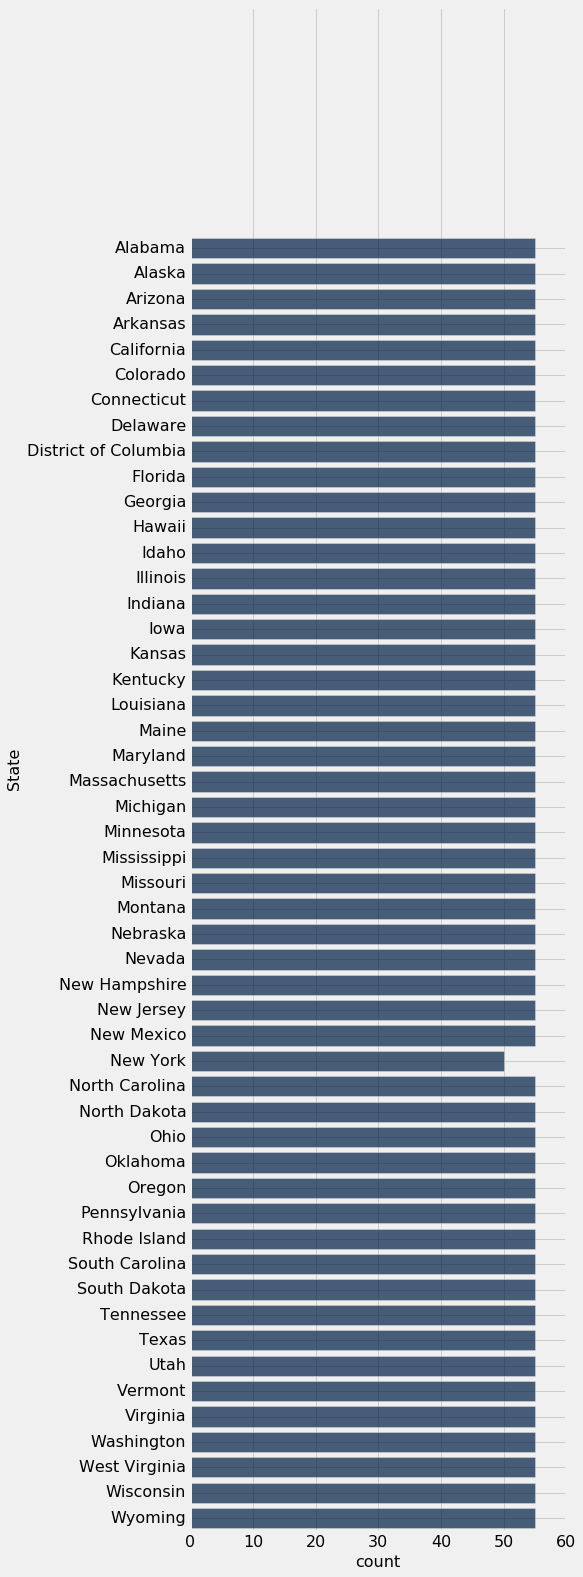

In [46]:
states.group_barh("State")

In [47]:
states.where("State", are.equal_to("New York"))

State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Revised rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
New York,1965,18073000,58802,836,2320,nan,28182,27464,495248,183443,253353,58452
New York,1966,18258000,62561,882,2439,nan,30098,29142,546904,196127,286409,64368
New York,1967,18336000,75124,996,2665,nan,40202,31261,617404,219157,314472,83775
New York,1968,18113000,98515,1185,2527,nan,59857,34946,730938,250918,375143,104877
New York,1969,18321000,105870,1324,2902,nan,64754,36890,731340,248477,367463,115400
New York,1970,18190740,124613,1444,2875,nan,81149,39145,779701,267474,386553,125674
New York,1971,18391000,145048,1823,3225,nan,97682,42318,789974,273704,388612,127658
New York,1972,18366000,138542,2026,4199,nan,86391,45926,666063,239886,321096,105081
New York,1973,18265000,135468,2040,4852,nan,80795,47781,678881,246246,320307,112328
New York,1974,18111000,145427,1919,5240,nan,86814,51454,766276,271824,390357,104095


## Average property crime in Alabama in each year

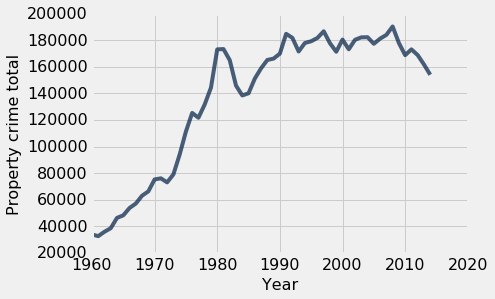

In [50]:
states.where("State", are.equal_to("Alabama")).select("Year", "Property crime total").plot(0, 1)

## Years with total property crime above 10 million

In [56]:
states.group("Year", sum).where("Property crime total sum", are.above(10000000)).column("Year")

array([1975, 1976, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006])

## A function

In [62]:
def years_with_high_property_crime(threshold):
    return states.group("Year", sum).where("Property crime total sum", are.above(threshold)).column("Year")

In [64]:
years_with_high_property_crime(10000000)

array([1975, 1976, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006])

In [63]:
years_with_high_property_crime(20000000)

array([], dtype=int64)

In [66]:
years_with_high_property_crime(12000000)

array([1980, 1981, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995])

## Average property crime in a random sample of 100 rows

In [61]:
np.mean(states.sample(100, with_replacement=False).column("Property crime total"))

219003.60000000001

## A function

In [67]:
def average_property_crime_in_sample(sample_size):
    return np.mean(states.sample(sample_size, with_replacement=False).column("Property crime total"))

In [68]:
average_property_crime_in_sample(100)

176373.89000000001

In [69]:
average_property_crime_in_sample(1000)

193665.45199999999